# Analyse Benchmarking Results

`````{margin}
````{dropdown} Necessary imports
```{code-block} python
from colosseum.analysis.plots import plot_indicator_in_hardness_space, agent_performances_per_mdp_plot
from colosseum.analysis.tables import get_latex_table_of_average_indicator, get_latex_table_of_indicators
```
````
`````

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import os
import shutil
from myst_nb import glue

from colosseum.analysis.plots import plot_indicator_in_hardness_space, agent_performances_per_mdp_plot
from colosseum.analysis.tables import get_latex_table_of_average_indicator, get_latex_table_of_indicators

benchmark_log_folder = "./experiments" + os.sep + "tabular" + os.sep + "benchmarking" + os.sep + "paper_results" + os.sep + "benchmark_continuous_communicating"

We'll reproduce the analysis of the benchmark results of the tabular agents in the continuous communicating setting presented in the accompanying {{paper}}.

<h3> Visualization tools </h3>

Two types of visualizations are available, tables and plots.
Note that $\LaTeX$ code for the tables is automatically generated.

<h4> Tables </h4>

````{margin}
```{important} 
The _booktabs_, _colortbl_, and  _xcolor_ packages are required to compile the $\LaTeX$ tables.
```
````

**Summary table**

The [`get_latex_table_of_average_indicator`](../pdoc_files/colosseum/analysis/tables.html#get_latex_table_of_average_indicator)
function produces a table that summarises the agents' performances in terms of a single indicator.

In [2]:
# The tex variable contains a LaTex ready version, whereas pd_table is a Pandas table
tex, pd_table = get_latex_table_of_average_indicator(
    benchmark_log_folder,
    "normalized_cumulative_regret",
    print_table=True,
    return_table=True,
)

                                    PSRL              Q-learning                   UCRL2
                                 prms_41                 prms_49                 prms_49
MDP                                                                                     
DeepSea           $\mathbf{0.78}\pm0.05$  $\mathbf{0.78}\pm0.00$           $0.90\pm0.01$
DeepSea           $\mathbf{0.99}\pm0.00$  $\mathbf{0.99}\pm0.00$  $\mathbf{0.99}\pm0.00$
DeepSea           $\mathbf{0.79}\pm0.04$  $\mathbf{0.79}\pm0.00$           $0.92\pm0.01$
FrozenLake        $\mathbf{0.01}\pm0.04$           $0.77\pm0.04$  $\mathbf{0.01}\pm0.01$
FrozenLake        $\mathbf{0.01}\pm0.02$           $0.84\pm0.04$           $0.04\pm0.06$
MiniGridEmpty              $0.95\pm0.22$           $0.51\pm0.23$  $\mathbf{0.02}\pm0.00$
MiniGridEmpty              $1.00\pm0.00$  $\mathbf{0.01}\pm0.00$           $0.02\pm0.00$
MiniGridEmpty              $0.60\pm0.50$  $\mathbf{0.00}\pm0.00$           $0.01\pm0.00$
MiniGridEmpty        

/home/michelangelo/miniconda3/envs/py39/lib/python3.9/site-packages/colosseum/analysis/tables.py:146: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_lat = table_lat.to_latex(escape=False).replace(


The $\LaTeX$ summary table is provided below.

In [3]:
print(tex)

\begin{tabular}{lccc}
\toprule
{} &                    PSRL &              Q-learning &                   UCRL2 \\
\midrule
DeepSea          &  $\mathbf{0.78}\pm0.05$ &  $\mathbf{0.78}\pm0.00$ &           $0.90\pm0.01$ \\
                 &  $\mathbf{0.99}\pm0.00$ &  $\mathbf{0.99}\pm0.00$ &  $\mathbf{0.99}\pm0.00$ \\
                 &  $\mathbf{0.79}\pm0.04$ &  $\mathbf{0.79}\pm0.00$ &           $0.92\pm0.01$ \\
\arrayrulecolor{black!15}\midrule%
FrozenLake       &  $\mathbf{0.01}\pm0.04$ &           $0.77\pm0.04$ &  $\mathbf{0.01}\pm0.01$ \\
                 &  $\mathbf{0.01}\pm0.02$ &           $0.84\pm0.04$ &           $0.04\pm0.06$ \\
\arrayrulecolor{black!15}\midrule%
MG-Empty    &           $0.95\pm0.22$ &           $0.51\pm0.23$ &  $\mathbf{0.02}\pm0.00$ \\
                 &           $1.00\pm0.00$ &  $\mathbf{0.01}\pm0.00$ &           $0.02\pm0.00$ \\
                 &           $0.60\pm0.50$ &  $\mathbf{0.00}\pm0.00$ &           $0.01\pm0.00$ \\
                 &         

**Indicators table**

The [`get_latex_table_of_indicators`](../pdoc_files/colosseum/analysis/tables.html#get_latex_table_of_indicators)
function produces a large table that can include multiple indicators. It also reports the the number of seeds that the agent was able to complete in the given training time limit.

In [4]:
# The tex variable contains a LaTex ready version
tex = get_latex_table_of_indicators(
    benchmark_log_folder,
    ["normalized_cumulative_regret", "steps_per_second"],
    show_prm_mdp=True,
    print_table=True,
)

                          Norm. cumulative regret Steps per second \# completed seeds
MDP            Agent                                                                 
DeepSea (1)    PSRL                 $0.78\pm0.05$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.78\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.90\pm0.01$    $0.00\pm0.00$             $0/20$
DeepSea (2)    PSRL                 $0.99\pm0.00$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.99\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.99\pm0.00$    $0.00\pm0.00$             $0/20$
DeepSea (3)    PSRL                 $0.79\pm0.04$    $0.00\pm0.00$             $0/20$
               Q-learning           $0.79\pm0.00$    $0.00\pm0.00$            $20/20$
               UCRL2                $0.92\pm0.01$    $0.00\pm0.00$             $0/20$
FrozenLake (1) PSRL                 $0.01\pm0.03$    $

/home/michelangelo/miniconda3/envs/py39/lib/python3.9/site-packages/colosseum/analysis/tables.py:317: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = table.to_latex(escape=False).split("\n")


The $\LaTeX$ indicators table is provided below.

In [5]:
print(tex)

\begin{tabular}{lllll}
\toprule
         &       & Norm. cumulative regret & Steps per second & \# completed seeds \\
MDP & Agent &                         &                  &                    \\
\midrule
DeepSea (1) & PSRL &           $0.78\pm0.05$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & Q-learning &           $0.78\pm0.00$ &    $0.00\pm0.00$ &            $20/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & UCRL2 &           $0.90\pm0.01$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{1-4}
DeepSea (2) & PSRL &           $0.99\pm0.00$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & Q-learning &           $0.99\pm0.00$ &    $0.00\pm0.00$ &            $20/20$ \\
\arrayrulecolor{black!15}\cmidrule{2-4}
         & UCRL2 &           $0.99\pm0.00$ &    $0.00\pm0.00$ &             $0/20$ \\
\arrayrulecolor{black!15}\cmidrule{1-4}
DeepSea (3) & PSRL &  

<h4> Plots </h4>

**Hardness space plot**

The [`plot_indicator_in_hardness_space`](../pdoc_files/colosseum/analysis/plots.html#plot_indicator_in_hardness_space) 
function produces a plot that places the average cumulative regret obtained by each agent in the benchmark MDPs in the 
position corresponding to the diameter and environmental value norm of the corresponding MDP.
This plot enables investigating which kind of complexity impacts the performance of the agents most.

/home/michelangelo/miniconda3/envs/py39/lib/python3.9/site-packages/colosseum/analysis/tables.py:146: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_lat = table_lat.to_latex(escape=False).replace(


benchmark_continuous_communicating:   0%|                                                                                                                           | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|████████████████▍                                                                                                  | 1/7 [00:00<00:01,  5.36it/s]

benchmark_continuous_communicating:  43%|█████████████████████████████████████████████████▎                                                                 | 3/7 [00:00<00:00,  8.47it/s]

benchmark_continuous_communicating:  57%|█████████████████████████████████████████████████████████████████▋                                                 | 4/7 [00:00<00:00,  8.68it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                | 6/7 [00:00<00:00,  7.83it/s]

benchmark_continuous_communicating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.25it/s]

benchmark_continuous_communicating:   0%|                                                                                                                           | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|████████████████▍                                                                                                  | 1/7 [00:00<00:01,  5.35it/s]

benchmark_continuous_communicating:  43%|█████████████████████████████████████████████████▎                                                                 | 3/7 [00:00<00:00,  8.46it/s]

benchmark_continuous_communicating:  57%|█████████████████████████████████████████████████████████████████▋                                                 | 4/7 [00:00<00:00,  8.62it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                | 6/7 [00:00<00:00,  7.78it/s]

benchmark_continuous_communicating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.21it/s]

benchmark_continuous_communicating:   0%|                                                                                                                           | 0/7 [00:00<?, ?it/s]

benchmark_continuous_communicating:  14%|████████████████▍                                                                                                  | 1/7 [00:00<00:01,  5.38it/s]

benchmark_continuous_communicating:  43%|█████████████████████████████████████████████████▎                                                                 | 3/7 [00:00<00:00,  8.48it/s]

benchmark_continuous_communicating:  57%|█████████████████████████████████████████████████████████████████▋                                                 | 4/7 [00:00<00:00,  8.66it/s]

benchmark_continuous_communicating:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                | 6/7 [00:00<00:00,  7.79it/s]

benchmark_continuous_communicating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.23it/s]

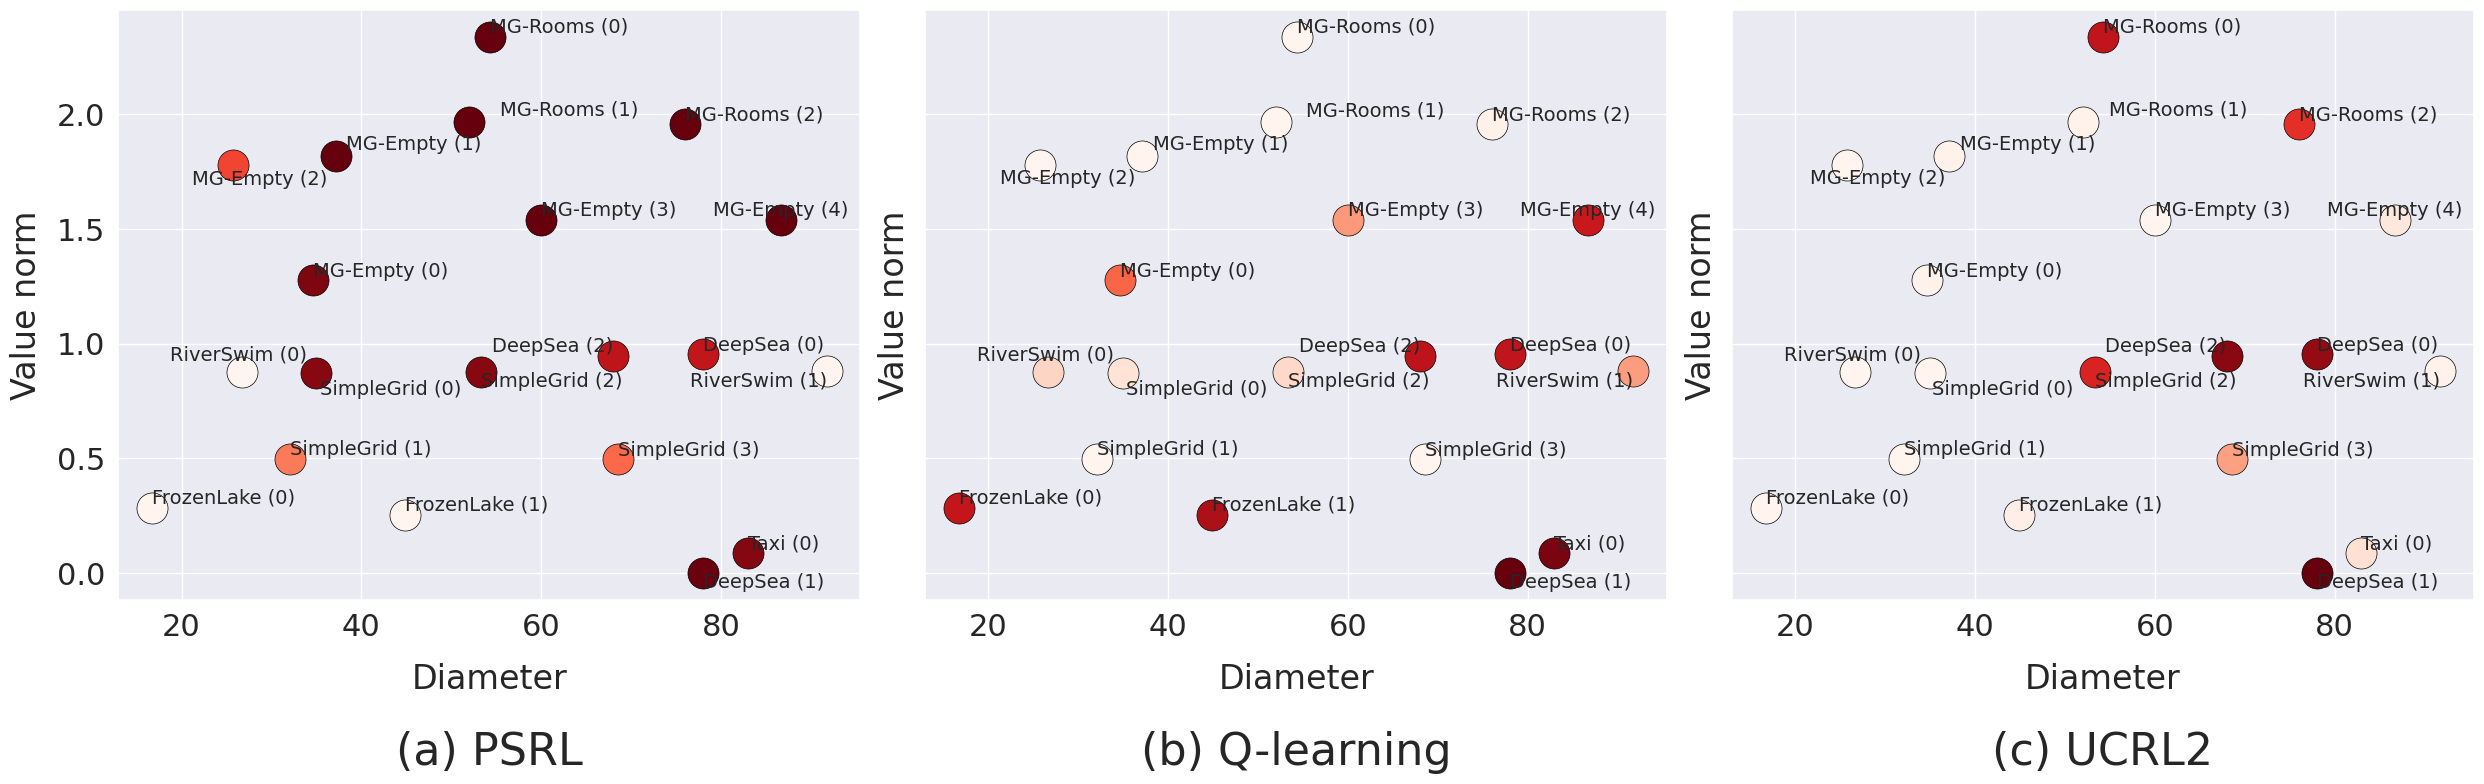

In [6]:
fig = plot_indicator_in_hardness_space(benchmark_log_folder, fontsize=24, savefig_folder = None)

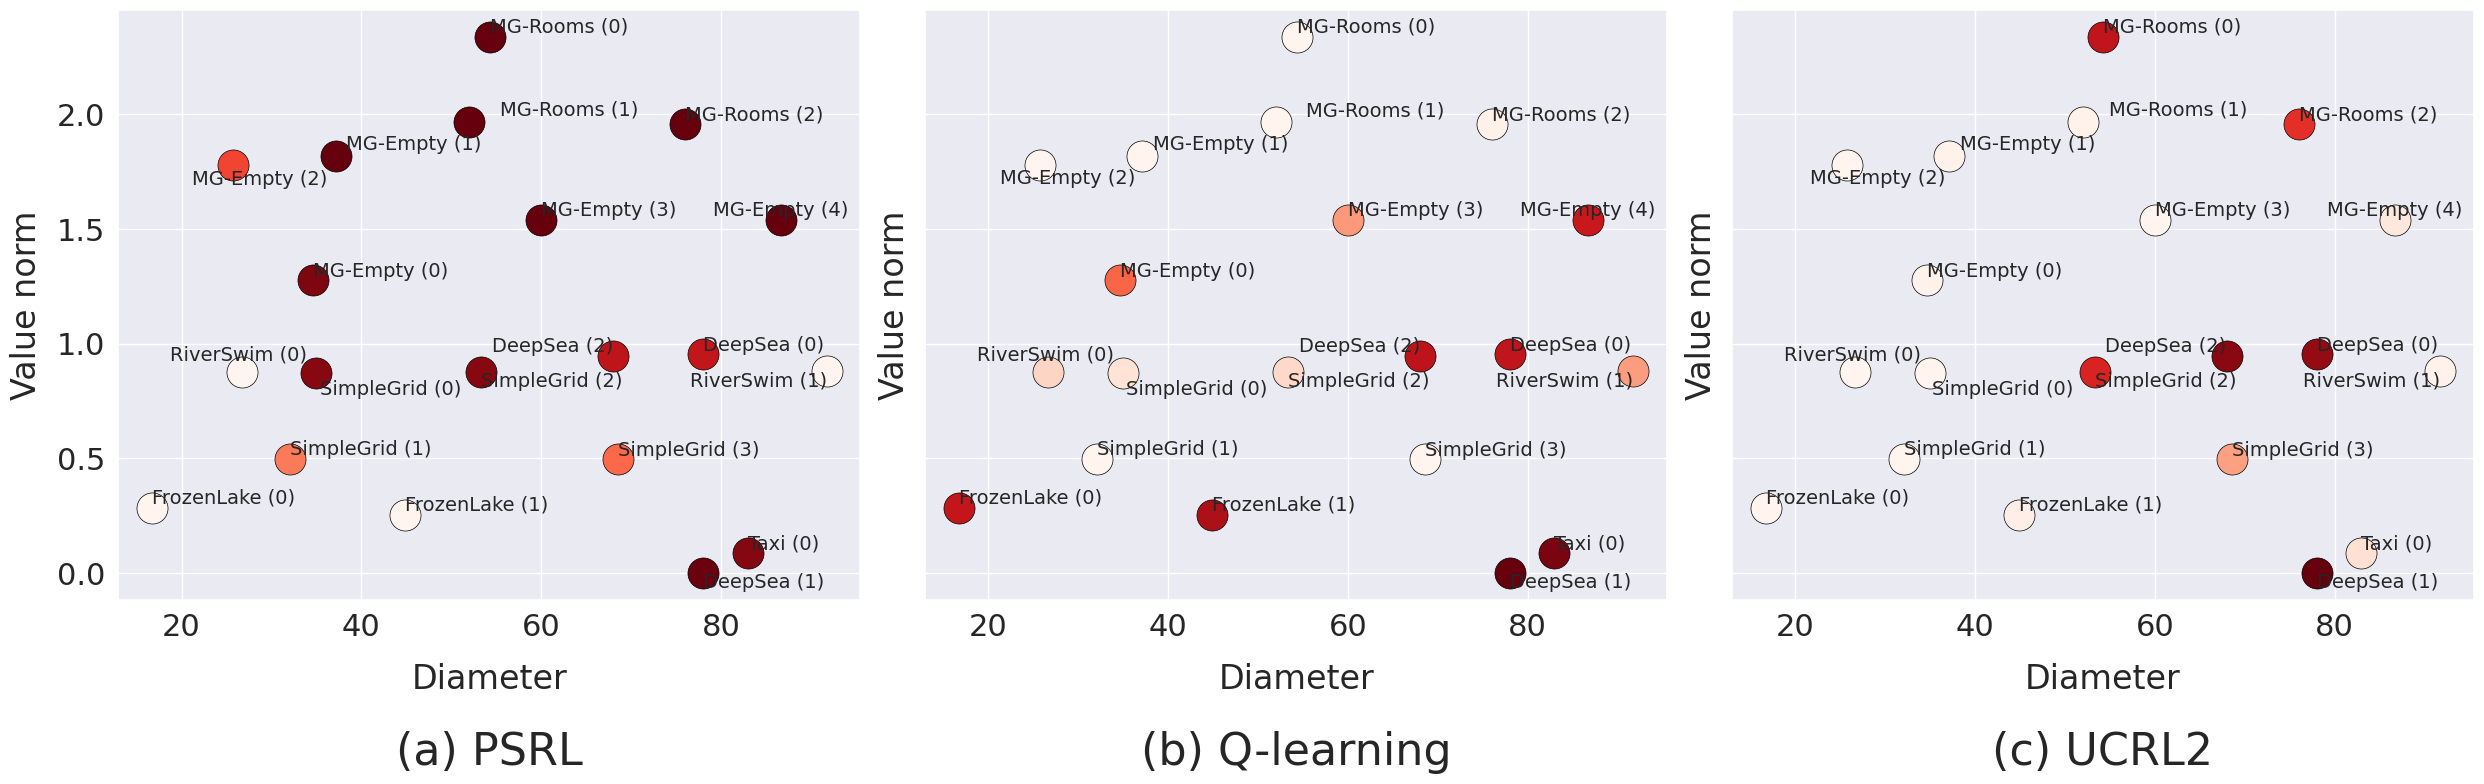

In [7]:
glue("hardness_space", fig, display=False)

````{div} full-width
```{glue:} hardness_space
```
````


**Online agents' performances**

The [`agent_performances_per_mdp_plot`](../pdoc_files/colosseum/analysis/plots.html#agent_performances_per_mdp_plot) function
produces a plot that shows the values for a given indicator during the agent/MDP interactions.
This plot enables easily comparing agents' performances in the benchmark MDPs and provides an intuitive overview of the critical moments of the agent/MDP interaction, e.g., when an agent runs out of time or reaches the optimal policy.

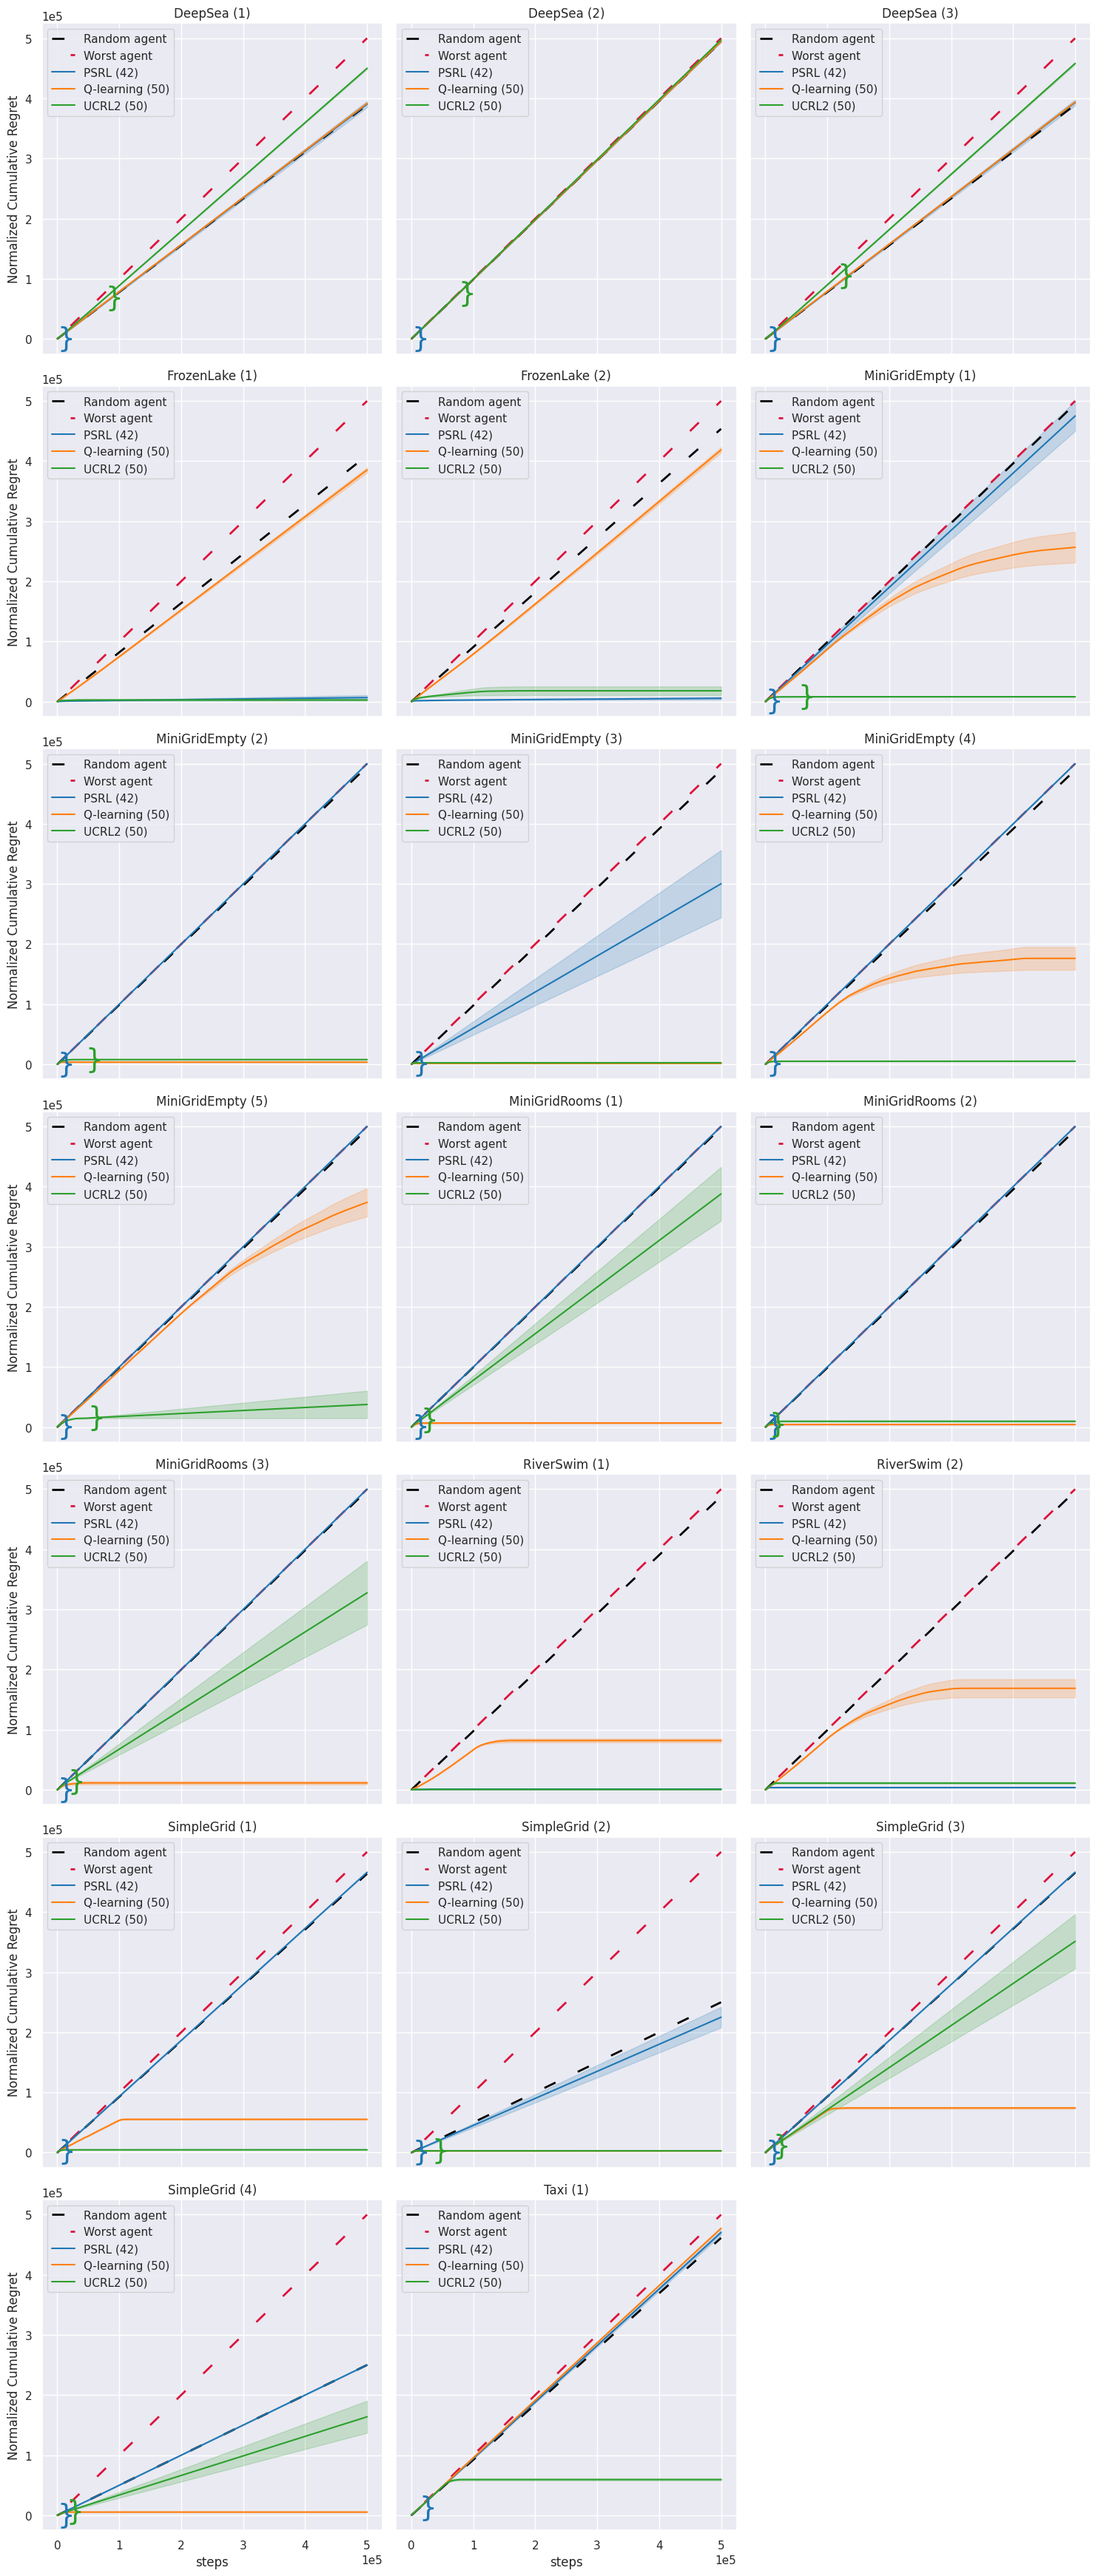

In [8]:
fig = agent_performances_per_mdp_plot(
    benchmark_log_folder,
    "normalized_cumulative_regret",
    figsize_scale=5,
    standard_error=True,
    n_rows=7,
    savefig_folder = None
)

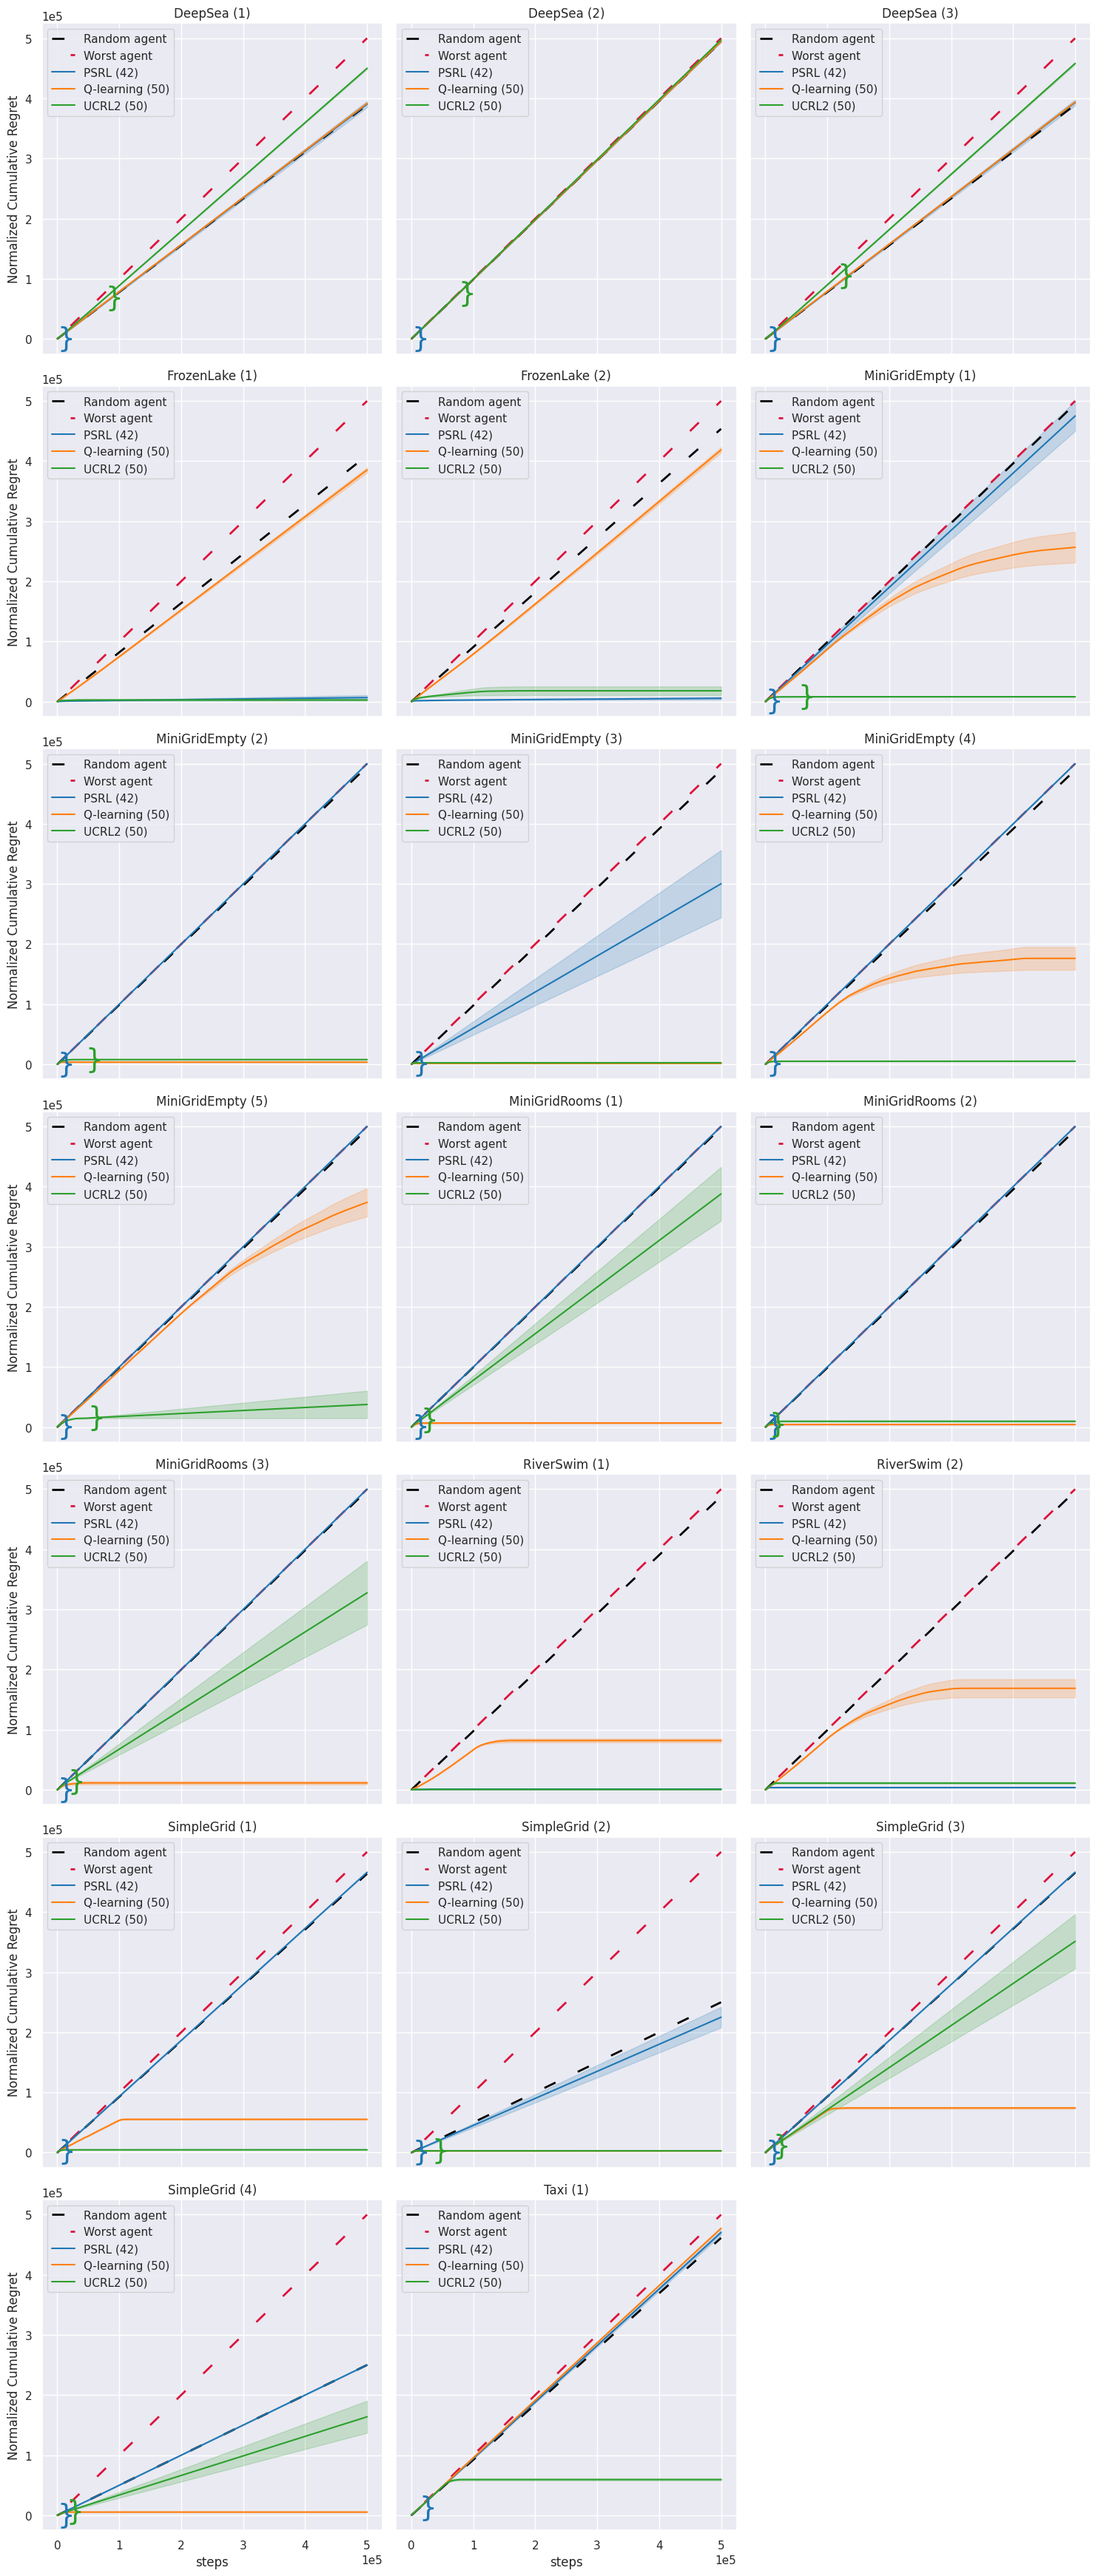

In [9]:
glue("performances_per_mdp_plot", fig, display=False)

`````{div} full-width
```{glue:} performances_per_mdp_plot
```
`````

In [10]:
from colosseum import config
shutil.rmtree("tmp", ignore_errors=True)
shutil.rmtree(config.get_hardness_measures_cache_folder(), ignore_errors=True)